In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pylab as plt
import pandas as pd
from scipy.optimize import newton
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from sympy import init_printing
init_printing() ##Latex

## 1. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta) $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si $u$ es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguietnes condiciones inciales.

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

```

1. Defina dos funciones, una para x y otra para y. 

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y 

```

In [ ]:
vo = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = vo/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

def pos_x(t, vo, theta0, u, alpha, b, g  ):
    t1 = u*np.cos(alpha)*t  
    t2 = 1./b*(vo*np.cos(theta0)-u*np.cos(alpha))  
    t3 = (1-np.exp(-b*t))
    return t1 + t2 * t3


def pos_y(t, vo, theta0, u, alpha, b, g  ):
    t1 = (g/b + vo*np.sin(theta0) - u* np.sin(alpha) )
    t2 = (1-np.exp(-b*t)) 
    t3 = (g/b - u*np.sin(alpha))*t 
    return 1./b * t1 * t2 - t3

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

In [ ]:
t = np.linspace(0, 8.5, 1000)
Params = (vo, theta, u, alpha, b , g)  #Parametros en tupla.
x = pos_x(t, *Params)
y = pos_y(t, *Params)

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 registros para el intervalo de tiempo elegido.

In [ ]:
dicc = {"x":x,"y":y ,"t":t}
df = pd.DataFrame(dicc)

4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).

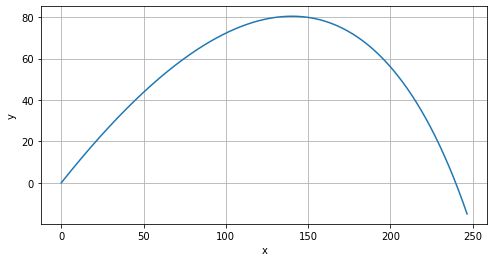

In [ ]:
plt.figure(figsize= (8,4))
plt.plot(df.x, df.y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

In [ ]:
tv = newton(pos_y, 6.5, args=Params)
# print(np.round(tv,3),'s')

In [ ]:
pos_x(tv, *Params)

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.

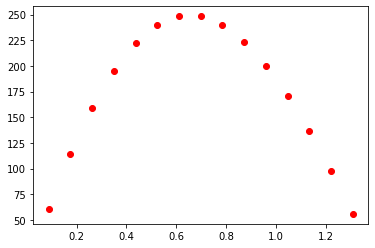

In [ ]:
theta = np.deg2rad(np.arange(5, 80, 5)) #Angulo de lanzamiento

Rmax = np.zeros(len(theta))

for i, te in enumerate(theta):
    Params = (vo, te, u, alpha, b , g)  #Parametros en tupla.
    tv = newton(pos_y, 6.5, args = Params)
    Rmax[i] = pos_x(tv, *Params)

plt.plot(theta, Rmax,"ro")

7. Realice una interpolacion de R como función de theta.



Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

In [ ]:
p = lagrange(theta, Rmax) 
# np.poly(p.coef)

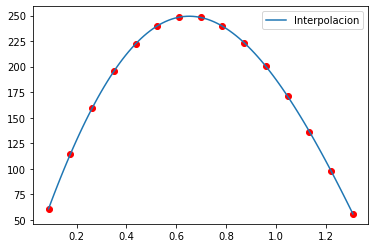

In [ ]:
taux = np.linspace(min(theta), max(theta), 100)

plt.plot(theta, Rmax,"ro" )
plt.plot(taux, p(taux),label = "Interpolacion")
plt.legend()
plt.show()

## 2.  Interpolación lagrange

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 
 

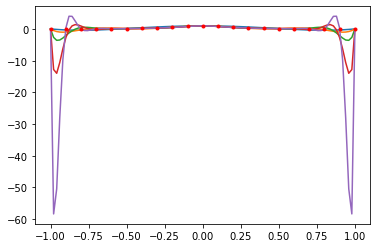

In [ ]:
n = np.arange(4,21,4)
f = lambda x: 1/(1+ 25*x*x)

for i in range(len(n)):
    t = np.linspace(-1,1,n[i]+1)

    p = lagrange(t,f(t))

    tt = np.linspace(-1,1,100)
    plt.plot(tt, p(tt))

plt.plot(t, f(t),'.r')

 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}, emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

In [14]:
c = sp.symbols("c") 
f5 = sp.diff(f(c),c, 5)
fxn5 = sp.lambdify(c,f5,'numpy')

n = 4
e = lambda x,t: (1/np.math.factorial(n+1))*(fxn5(x))*(x-t[0])*(x-t[1])*(x-t[2])*(x-t[3])*(x-t[4])

print(f'Cuota de error para {n} puntos: {e(.5,t):.3f}')

Cuota de error para 4 puntos: -22.367


## 3.  Interpolación Hermite

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 
 

 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}, emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

# 4. Spline Cúbico

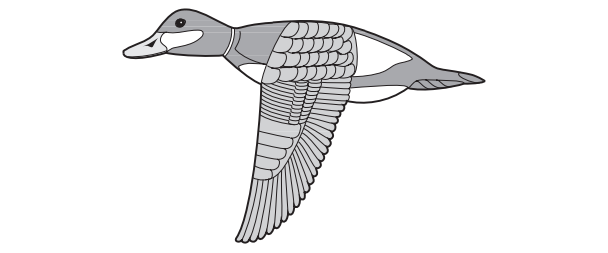

Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 

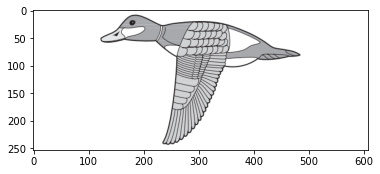

In [15]:
plt.imshow(plt.imread('paloma.png'))

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

In [16]:
x = np.array([0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3])
y = np.array([1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25])

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

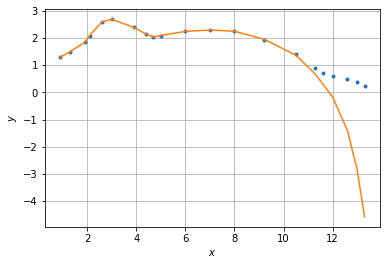

In [18]:
pl = lagrange(x,y)
plt.plot(x,y,'.')
plt.plot(x,pl(x))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid()
plt.show()

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 

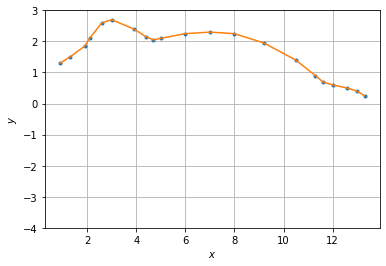

In [26]:
pc = CubicSpline(x,y)
plt.plot(x,y,'.')
plt.plot(x,pc(x))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.ylim([-4,3])
plt.grid()
plt.show()

5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

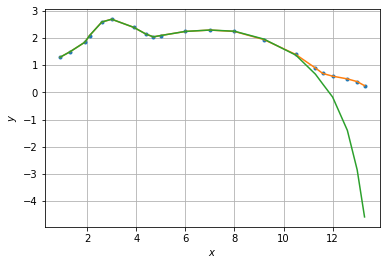

In [21]:
pl = lagrange(x,y)
pc = CubicSpline(x,y)
plt.plot(x,y,'.')
plt.plot(x,pc(x))
plt.plot(x,pl(x))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid()
plt.show()